# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv0 as e
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [6]:
env = e.Environment(0.4, 9)
from dqn_agent import Agent
agent = Agent(state_size=2, action_size=3, seed=0)

In [7]:
rho = 0.47370147705078125
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    if reward > 1:
        return 1
    if reward < -1:
        return -1
    return reward

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 100	Average Score: -0.33
0.9900493386913721
[[0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 2. 2. 2. 2.]]
0 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
4 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
5 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
6 & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt & \wt \\ 
7 & \ag & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt \\ 
8 & \ag & \ag & \ag & \ag & \ag & \wt & \wt & \wt & \wt \\ 

Episode 200	Average Score: -0.21
0.980197693043223
[[0. 0. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 2. 2. 2. 2. 2. 2.

Episode 1100	Average Score: -0.18
0.8958292078938495
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
5 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
6 & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
7 & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
8 & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 

Episode 1200	Average Score: -0.15
0.886915114855721
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 

Episode 2100	Average Score: -0.17
0.8105757343128605
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 

Episode 2200	Average Score: -0.23
0.8025099697157205
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2.

Episode 3100	Average Score: -0.24
0.7334355871266565
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 3200	Average Score: -0.16
0.7261374180074647
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2.

Episode 4100	Average Score: -0.22
0.6636366445386316
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 4200	Average Score: -0.19
0.657033021056833
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 

Episode 5100	Average Score: -0.25
0.6004802653493791
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 5200	Average Score: -0.11
0.594505089606372
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 

Episode 6100	Average Score: -0.12
0.5433342960208886
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 1. 2. 2. 2. 2.]
 [2. 1. 1. 1. 1. 1. 2. 2. 2.]
 [2. 1. 1. 1. 1. 1. 1. 2. 2.]
 [2. 2. 1. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \ob & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \ob & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 6200	Average Score: -0.05
0.5379277604638235
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2.

Episode 7100	Average Score: -0.08
0.4916267432381818
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 7200	Average Score: -0.20
0.4867347320259549
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2.

Episode 8100	Average Score: -0.13
0.44484004863497356
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 

Episode 8200	Average Score: -0.05
0.4404135959744933
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2

Episode 9100	Average Score: 0.021
0.40250590837711264
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 

Episode 9200	Average Score: -0.09
0.39850070840813034
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 

Episode 10100	Average Score: 0.091
0.36420058575127745
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 

Episode 10200	Average Score: 0.030
0.36057654907406234
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2

Episode 11100	Average Score: -0.14
0.32954066984104946
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 

Episode 11200	Average Score: -0.06
0.32626152224804283
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2

Episode 12100	Average Score: 0.131
0.2981792378375013
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 

Episode 12200	Average Score: -0.13
0.2952121572325153
[[2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 

Episode 13100	Average Score: 0.09
0.26980238257159034
[[2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 13200	Average Score: -0.05
0.26711767044235935
[[2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2.

Episode 14100	Average Score: 0.02
0.24412607051124421
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 2. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
1 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt \\ 

Episode 14200	Average Score: 0.170
0.24169685466698065
[[2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 2.

Episode 15100	Average Score: 0.15
0.22089329877376948
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 15200	Average Score: 0.37
0.21869526437232614
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 2. 2. 2. 2. 

Episode 16100	Average Score: 0.061
0.19987152269716466
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
1 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \wt \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 16200	Average Score: 0.10
0.1978826688695654
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 2. 2. 2. 2. 

Episode 17100	Average Score: 0.20
0.1808503282220301
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 1. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
1 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 17200	Average Score: 0.25
0.1790507478583385
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 2. 2. 2. 2. 2.

Episode 18100	Average Score: 0.23
0.163639325786154
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 1. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
1 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 18200	Average Score: 0.32
0.16201100627848367
[[2. 2. 2. 2. 2. 2. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 1. 2. 2. 2. 2. 2.

Episode 19100	Average Score: 0.21
0.1480662446510568
[[2. 2. 2. 2. 2. 2. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 1. 2. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag & \ag \\ 
1 & \wt & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
2 & \wt & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
3 & \wt & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt \\ 
4 & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \wt & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \ob & \wt \\ 

Episode 19200	Average Score: 0.23
0.14659288759929356
[[2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [2. 1. 2. 2. 2. 2. 2

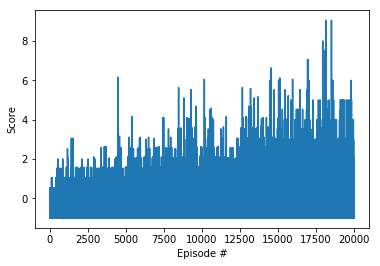

In [8]:
def dqn(n_episodes=20000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward, done = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state, done)
            state = next_state
            score += reward_val
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            print(eps)
            policy = agent.extractPolicy()
            agent.processPolicy(policy)
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [4]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  